## Time Series Analysis

An investor wants to know if a certain investment portfolio is worth investing in and has asked an analyst to do a quick analysis, to obtain the model equation and make his own conclusions:

Let's start the data analysis with a brief exploratory analysis:

In [3]:
setwd("C:/Users/Victoria/Documents/Git_Projects")
getwd() 

options(scipen=999)

install.packages("tseries")
install.packages("lmtest")
library(tseries)
library(lmtest) 

[1] "C:/Users/Victoria/Documents/Git_Projects"

also installing the dependency 'quadprog'




  There is a binary version available but the source version is later:
         binary  source needs_compilation
tseries 0.10-48 0.10-51              TRUE

  Binaries will be installed
package 'quadprog' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Victoria\AppData\Local\Temp\RtmpEZiz2w\downloaded_packages

  There is a binary version available but the source version is later:
       binary source needs_compilation
lmtest 0.9-38 0.9-40              TRUE

  Binaries will be installed
package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Victoria\AppData\Local\Temp\RtmpEZiz2w\downloaded_packages


Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [4]:
serie <- read.ts("dados_serie.txt", header = FALSE, sep = "", skip = 0)

In [5]:
#Exploratory series analysis
summary(serie)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.768364 -0.889839 -0.012787 -0.002684  0.851857  4.147622 

Analyzing the graph of the series, doing the first visual check to see if the series indicates stationarity

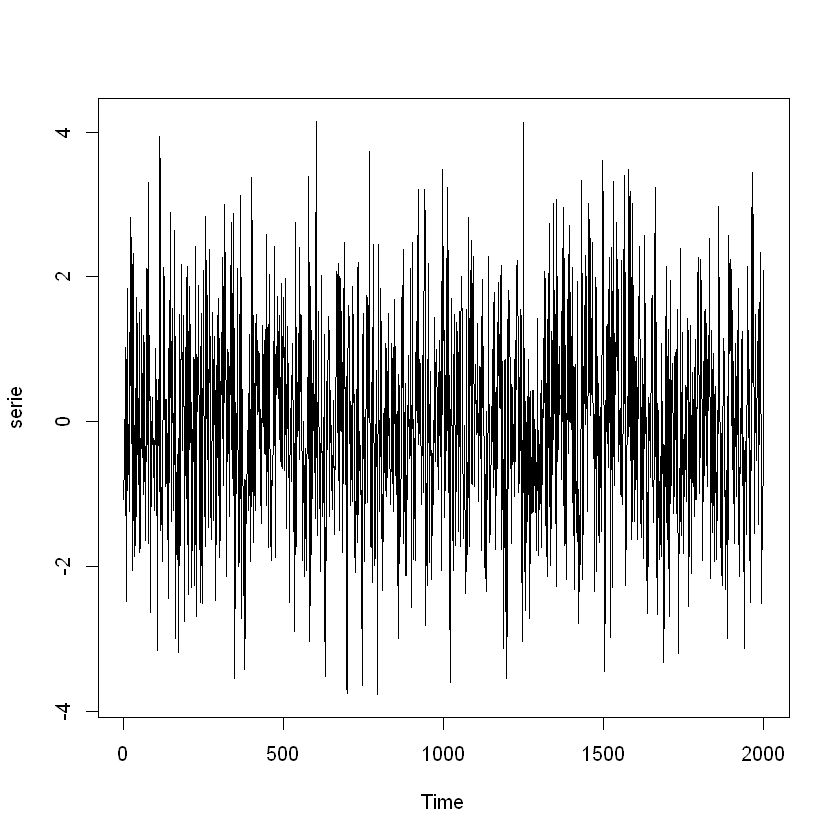

In [6]:
par(mfrow=c(1,1))
ts.plot(serie)

Now, let's perform the ADF test to confirm if the series is stationary:

In [7]:
adf.test(serie)

Warning message in adf.test(serie):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  serie
Dickey-Fuller = -11.593, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


Once the series is stationary, we identify the most appropriate model

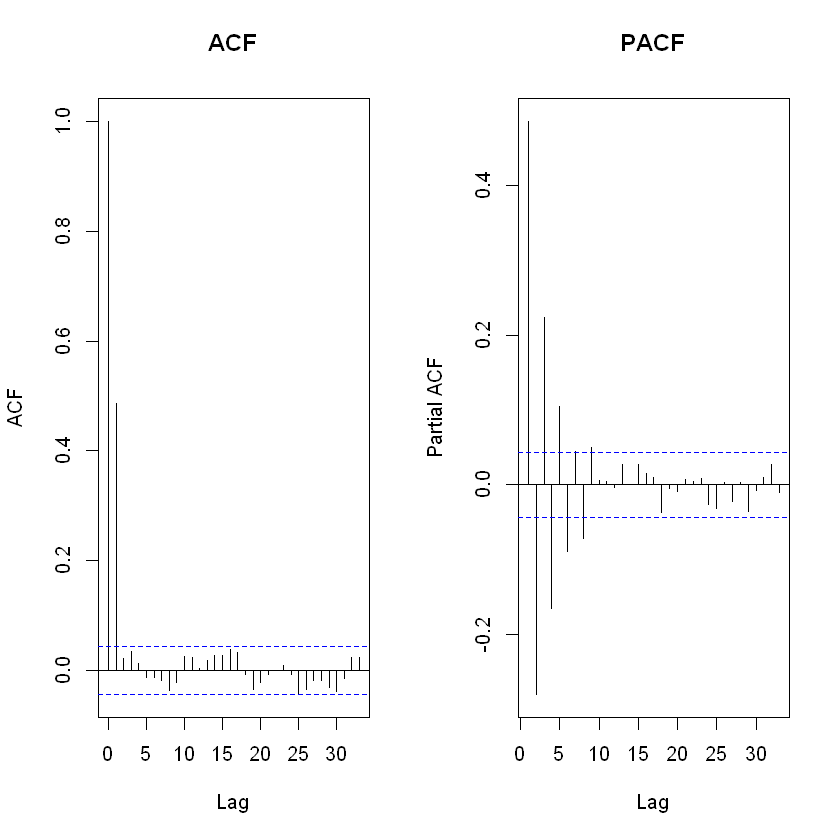

In [8]:
par(mfrow=c(1,2))
acf(serie, main="ACF")
pacf(serie,main="PACF")

Analyzing the two graphs, we notice that in the ACF we have much less memory compared to what we see in the PACF, we can initially consider that we are dealing with a time series model called MA(1)

In [9]:
modelo <- arima(serie, order = c(0,0,1), fixed = c(NA,NA), method = c("ML"))

In [10]:
#Hypothesis testing of parameters:
coeftest(modelo)


z test of coefficients:

            Estimate Std. Error z value            Pr(>|z|)    
ma1        0.7607385  0.0144410 52.6792 <0.0000000000000002 ***
intercept -0.0026656  0.0402744 -0.0662              0.9472    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [11]:
#Removing the intercept
modelo <- arima(serie, order = c(0,0,1), fixed = c(NA,0), method = c("ML"))
coeftest(modelo)


z test of coefficients:

    Estimate Std. Error z value              Pr(>|z|)    
ma1  0.76075    0.01444  52.681 < 0.00000000000000022 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


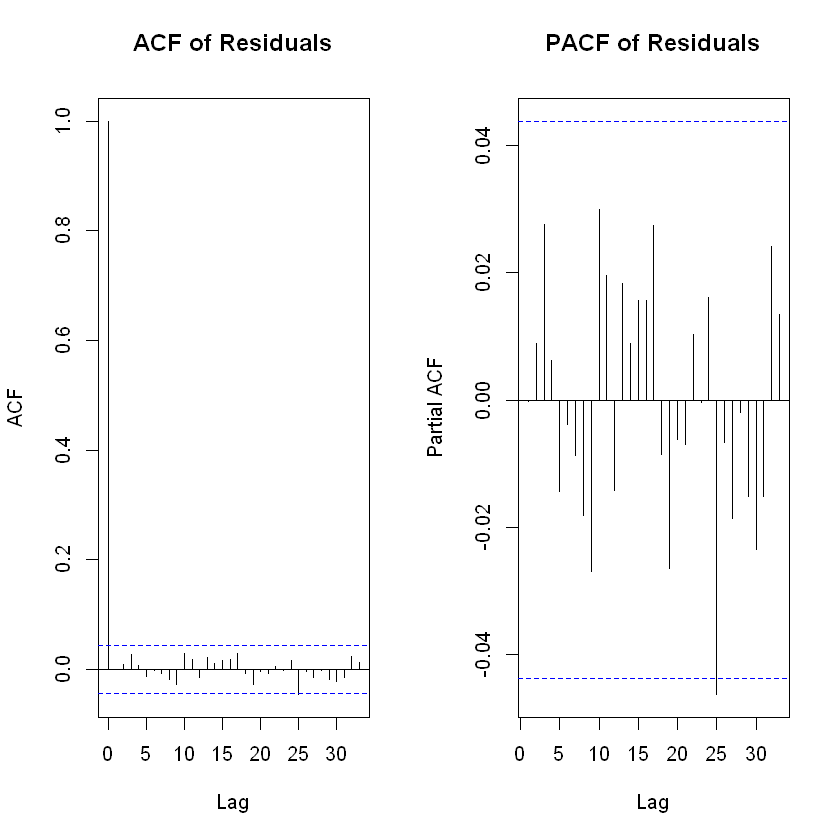

In [12]:
#Residual analysis:
par(mfrow=c(1,2))
acf(residuals(modelo), main="ACF of Residuals")
pacf(residuals(modelo), main="PACF of Residuals")

We observe with the residuals that the model is not yet fully fitted. Lag 25 is beyond the confidence interval. In this case, we will add an AR to the model, assuming the ARMA(25) configuration, and see if we need to do any further adjustment:

In [13]:
modelo<- arima(serie, order = c(25,0,1), fixed =
                 c(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,NA,0), method = c("ML"))
coeftest(modelo)

Warning message in arima(serie, order = c(25, 0, 1), fixed = c(0, 0, 0, 0, 0, 0, :
"some AR parameters were fixed: setting transform.pars = FALSE"


z test of coefficients:

      Estimate Std. Error z value             Pr(>|z|)    
ar25 -0.047351   0.022448 -2.1094              0.03491 *  
ma1   0.761481   0.014431 52.7657 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


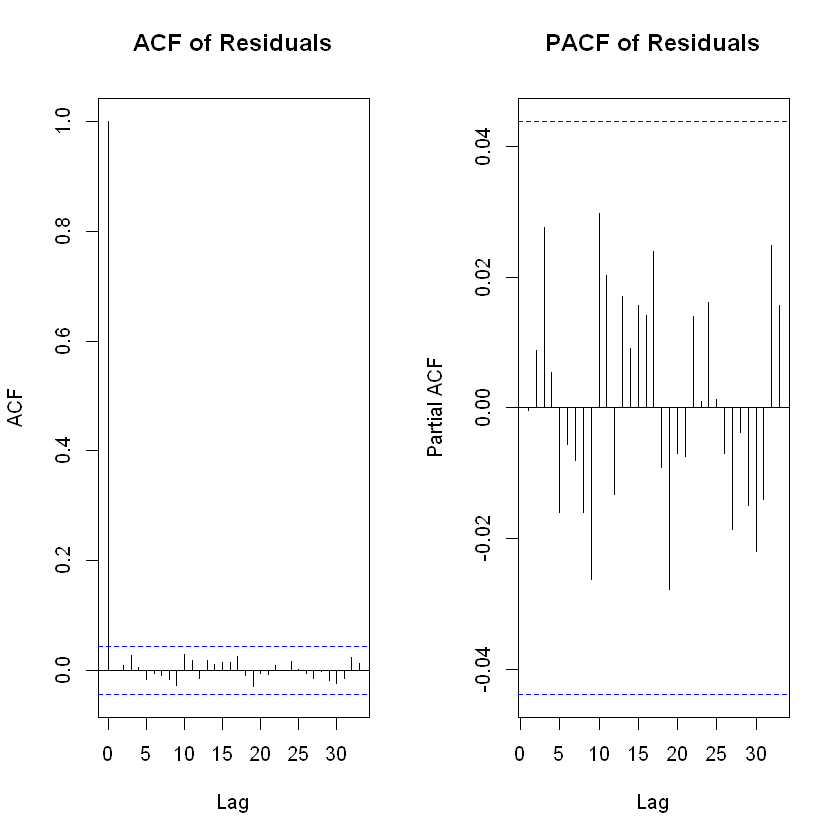

In [14]:
#Residual analysis:
par(mfrow=c(1,2))
acf(residuals(modelo), main="ACF of Residuals")
pacf(residuals(modelo), main="PACF of Residuals")

Once the model is fitted, showing white noise in the residuals, we can build the model equation for our client, with the coefficients obtained:

#### 𝑌𝑡=−0,0474∗𝑌𝑡−25+0,7615∗𝜀𝑡−1